<a href="https://www.kaggle.com/code/benlittell/quality-time?scriptVersionId=109333302" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/qualitytimedata/website_times.txt


In [2]:
# import pandas as pd
# import numpy as np
import matplotlib.pyplot as plt

path = '../input/qualitytimedata/website_times.txt'
qt_df = pd.read_csv(path, delim_whitespace=True)

def median(data):
    data.sort()
    if len(data)%2 == 0:
        m = (data[len(data)//2] + data[len(data)//2-1])/2
    else:
        m = data[len(data)//2]
    return m

def quartile(data):
    if len(data)%2==0:
        h1 = data[slice(int(len(data)/2))]
        h2 = data[slice(int(len(data)/2), len(data))]
        q1 = median(h1)
        q2 = median(data)
        q3 = median(h2)
    else:
        q2 = median(data)
        h1 = data[slice(data.index(q2))]
        h2 = data[slice(data.index(q2), len(data))]
        q1 = median(h1)
        q3 = median(h2)
    return [q1, q2, q3]

        


web_a_list = qt_df['Website_A'].tolist()
web_b_list = qt_df['Website_B'].tolist()

test = [24, 25, 26, 27, 30, 32, 40, 44, 50, 52, 55, 57]
tquars = quartile(test)
print(tquars)

[26.5, 36.0, 51.0]


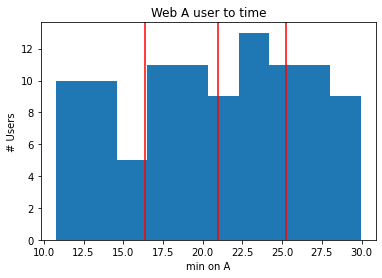

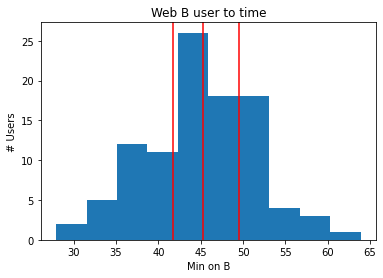

In [3]:
# histogram
def plot_hist(data, tit, xlabel, ylabel):
    qs = quartile(data)
    plt.hist(data)
    plt.title(tit)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.axvline(qs[0], color='r')
    plt.axvline(qs[1], color='r')
    plt.axvline(qs[2], color='r')
    plt.show()
    

web_a_quars = quartile(web_a_list)
web_b_q = quartile(web_b_list)
plot_hist(web_a_list, 'Web A user to time', 'min on A', '# Users')
plot_hist(web_b_list, 'Web B user to time', 'Min on B', '# Users')


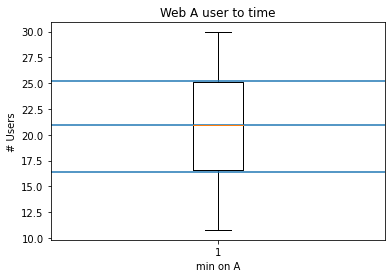

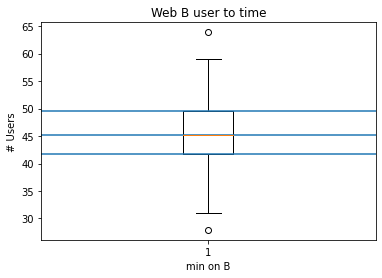

In [4]:
def plotbox(data, tit, xlabel, ylabel):
    qs = quartile(data)
    plt.boxplot(data)
    plt.title(tit)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.axhline(qs[0])
    plt.axhline(qs[1])
    plt.axhline(qs[2])
    plt.show()




plotbox(web_a_list,'Web A user to time', 'min on A', '# Users')
plotbox(web_b_list,'Web B user to time', 'min on B', '# Users')

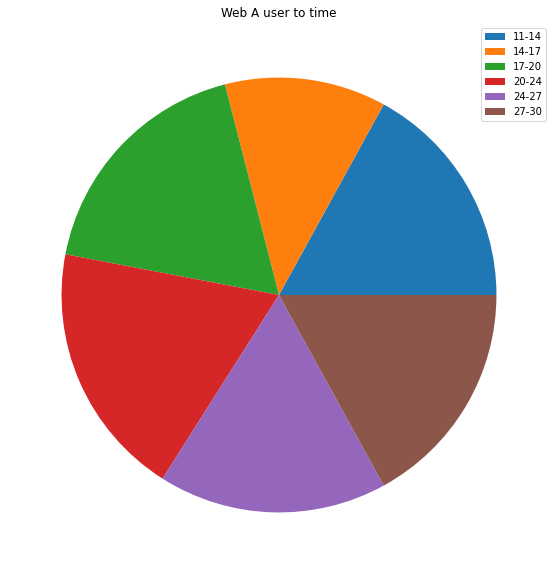

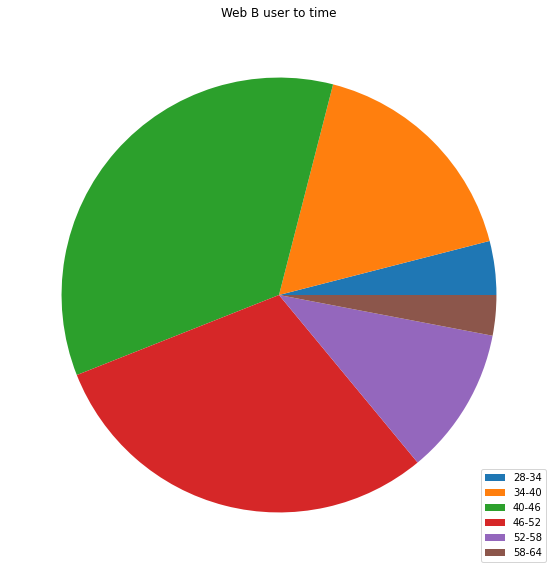

In [5]:
def plotpie(data, tit, n=4):
    splits, leg = steps(data, n)
    plt.figure(figsize=(10,10))
    plt.pie(splits)
    plt.legend(leg)
    plt.title(tit)
    plt.show()

def steps(data, step):
    dran = ((max(data) - min(data)) / step)
    nlist = []
    tlist = []
    for number in range(1, step+1):
        list2 = []
        for val in data:
            if val<=min(data)+dran*number and val>=min(data)+dran*(number-1):
                list2.append(val)
        nlist.append(len(list2))
        tlist.append(f'{round(min(data)+dran*(number-1))}-{round(min(data) + dran * number)}')

    return nlist, tlist


plotpie(web_a_list, 'Web A user to time', n=6)
plotpie(web_b_list, 'Web B user to time', n=6)
